## Exploration Data Analysis
source: Based on the homework of Guillaume Delporte for the course "Foundation od Data science".

In [25]:
import pandas as pd
import os, pytz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# get the data
merged_df = pd.read_csv('../data/merged.csv',  sep=';', index_col=0,  parse_dates=[0])
cleaned_df = pd.read_csv('../data/cleaned.csv', sep=';', index_col=0,  parse_dates=[0])

### 1. Visualization of the raw data and missing values.

In [27]:
print('Number of missing values in merged_df: ', merged_df.isna().sum().iloc[0],', ' , merged_df.isna().sum().iloc[20],'\n')
 
# Compute p/n ratio for the merged/clean df
print('p/n ratio for merged_df: ', len(merged_df)/ len(merged_df.columns),'\n')
print('p/n ratio for cleaned_df: ', len(cleaned_df)/ len(cleaned_df.columns),'\n')

# Now that we chose complete case, let's define the main dataframe as cleaned_df for ease of use
df = cleaned_df.copy()

df.head()

Number of missing values in merged_df:  4750 ,  61343 

p/n ratio for merged_df:  3062.6774193548385 

p/n ratio for cleaned_df:  930.6451612903226 



,id,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_Total,...,CU,CM,CD,TT2M,ST,RH2m,WS10m,WS100m,PREC,SNOW
2022-01-01 02:15:00+02:00,577035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.38,8.38,93.34,3.46,9.10,0.0,0.0
2022-01-01 02:30:00+02:00,577038.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.52,8.52,92.18,3.81,9.52,0.0,0.0
2022-01-01 02:45:00+02:00,577041.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.66,8.66,90.91,4.15,9.66,0.0,0.0
2022-01-01 03:00:00+02:00,577044.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.76,8.76,90.18,4.36,9.50,0.0,0.0
2022-01-01 03:15:00+02:00,577047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.74,8.74,90.39,4.38,9.16,0.0,0.0


- In the file merged.csv which contains NaN, we observe that there are 4750 rows without correspondence to the forecast files.
- Regarding the forecast files, we see 61343 lines with missing values.
- However, when computing the ratio of samples to features, we find an enormous value of 3062, well above the recommended rule of thumb of 5 for a comprehensive analysis of multivariate data, as discussed in the high-dimensional statistics course.
In attempting to use the complete case scenario, we find that the $p/n$ ratio is still greater than 930, indicating that we should be fine just by ignoring NaN rows.
- Let's shift our focus to the cleaned dataframe. When examining power values, we notice that the panels start producing energy from around 9 AM to 5 PM in the winter, which seems logical, and from 5:30 AM to 10 PM in the summer.

### 2. Boxplot for the different power column

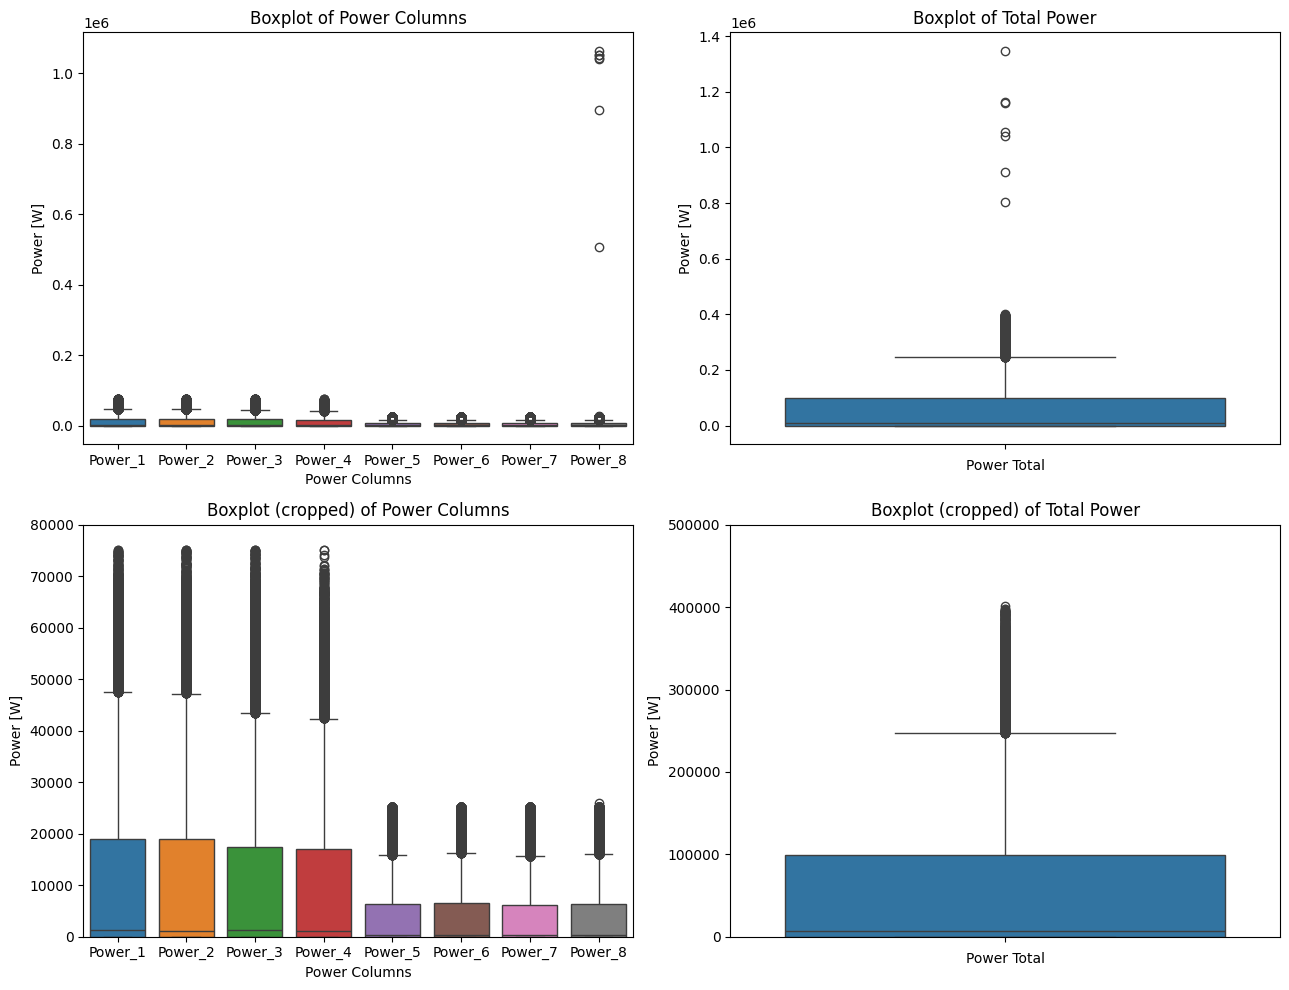

In [28]:
# define the power columns
power_columns = ["Power_1", "Power_2", "Power_3", "Power_4", "Power_5", "Power_6", "Power_7", "Power_8"]

# define the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

# plot the boxplots
sns.boxplot(data=df[power_columns], orient='v', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Power Columns')
axes[0, 0].set_ylabel('Power [W]')
axes[0, 0].set_xlabel('Power Columns')

sns.boxplot(data=df['Power_Total'], orient='v', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Total Power')
axes[0, 1].set_ylabel('Power [W]')
axes[0, 1].set_xlabel('Power Total')

sns.boxplot(data=df[power_columns], orient='v', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot (cropped) of Power Columns')
axes[1, 0].set_ylabel('Power [W]')
axes[1, 0].set_xlabel('Power Columns')
axes[1, 0].set_ylim(0, .08*1e6)

sns.boxplot(data=df['Power_Total'], orient='v', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot (cropped) of Total Power')
axes[1, 1].set_ylabel('Power [W]')
axes[1, 1].set_xlabel('Power Total')
axes[1, 1].set_ylim(0, .5*1e6)

# adjust the layout
plt.tight_layout()
plt.savefig('pl_1.png')

- When looking at the boxplots for the different power column, we get a first view at the erratic functionning of 'Power_8' plant. When looking at google earth sattelite picture, we can see that the Parking B and C are made up of 8 plants made of 160 panels each. A value of more or less 1 Million watts peak would indicate that each panel would produce 6250 Watts, which is impossible, as panels nowadays are not able to produce this much power. We think these are more of a sensor issue.
- When cropping the boxplots to have a better look at them. We can see that Power plants from range 1 to 4 produce much more energy than the one from 5 to 8.

### 3. Evolution of the energy
- we can see that some times, the sensor malfunctions and a 0 is written in the file
- we can observe that more energy seems to be produced during summer as the steep is greater


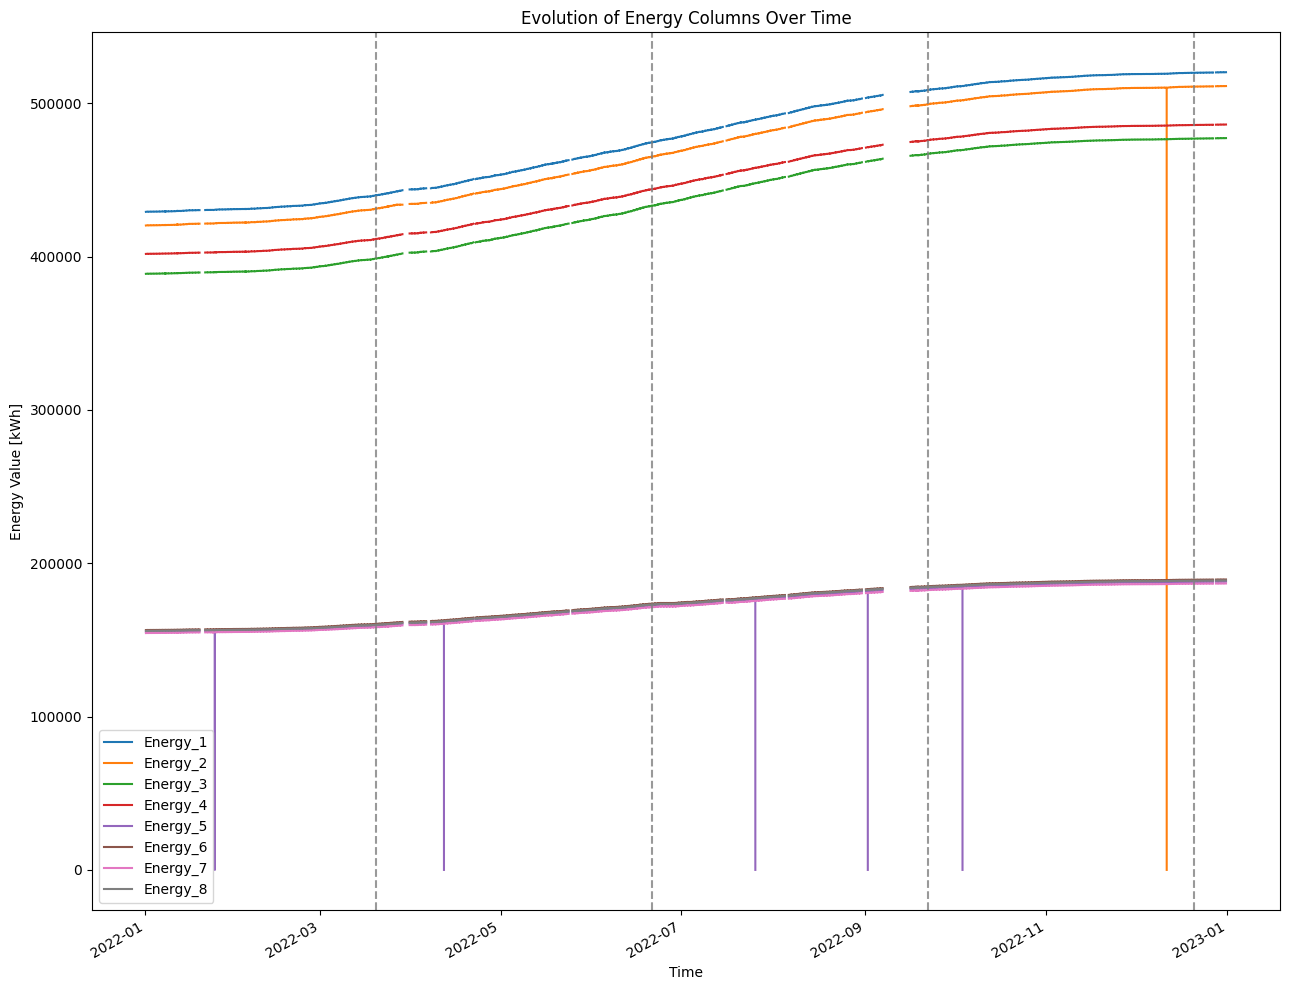

In [29]:

# define the energy columns
columns_to_plot = ["Energy_1", "Energy_2", "Energy_3", "Energy_4", "Energy_5", "Energy_6", "Energy_7", "Energy_8"]

df_kwh = df.copy()
df_kwh[columns_to_plot] = df[columns_to_plot] / 1000

# Plot the energy columns on the created axis
ax = df_kwh[columns_to_plot].plot(figsize=(13, 10))

# Mark season changes with vertical lines
season_changes = ["2022-03-20", "2022-06-21", "2022-09-22", "2022-12-21"]
for date in season_changes:
    ax.axvline(pd.Timestamp(date), color='gray', linestyle='--', alpha=0.8)

# Set the title, x-label, y-label, and legend
plt.title("Evolution of Energy Columns Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Value [kWh]")
plt.legend()
plt.tight_layout()
plt.savefig('pl_2.png')


### 4. Evolution of the Solar irrandiance
- the top solar irradiance values will be in the summer, explicitely at the summur solstice, when the day is the longest. The top solar irradiace curve seems to be smoother and with lower variance.

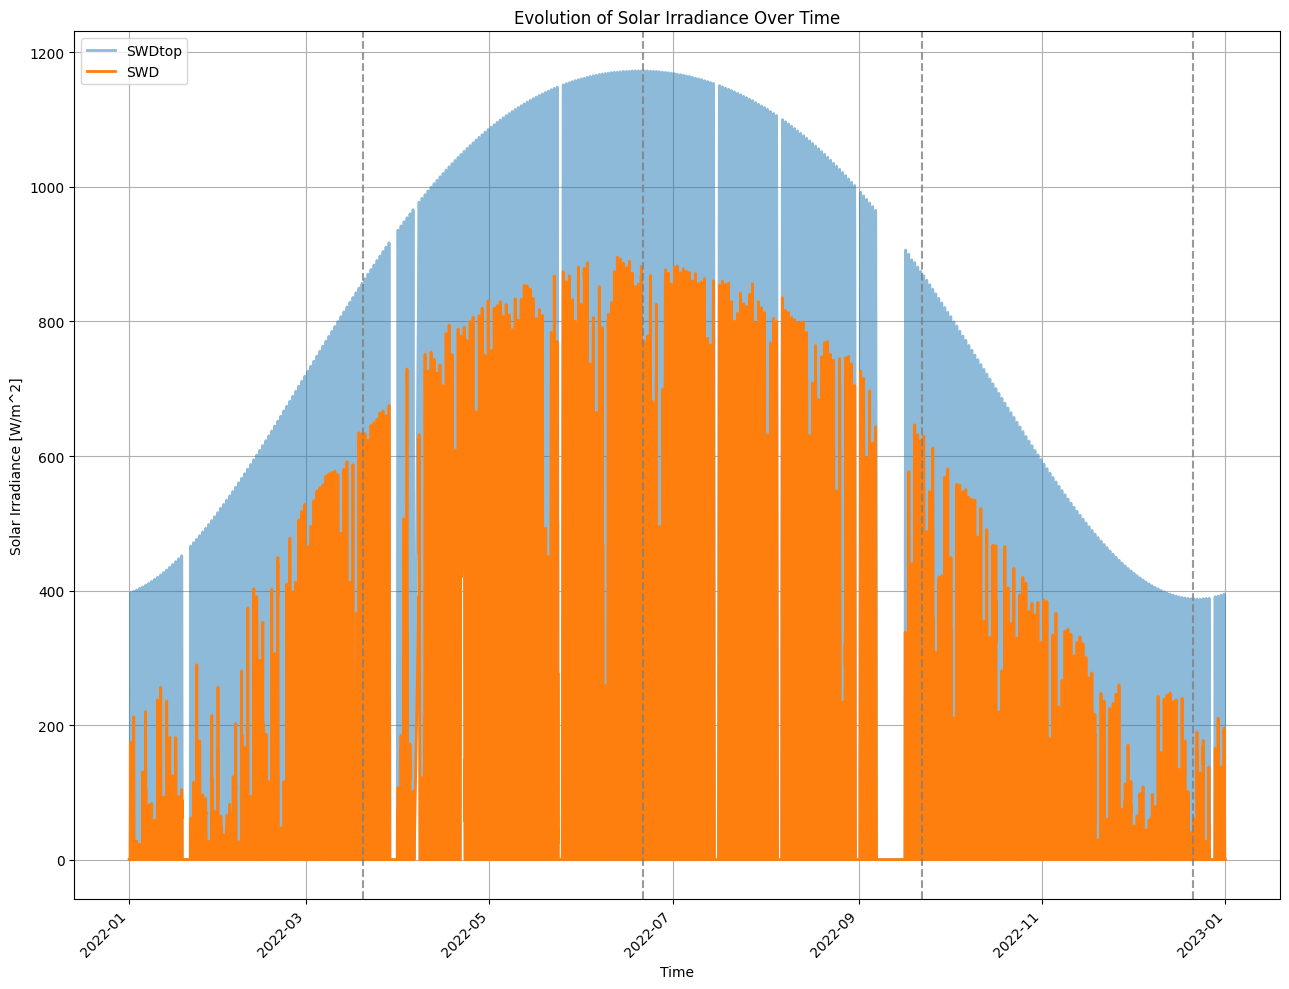

In [30]:
columns_to_plot = ["SWD", "SWDtop"]

ax = df["SWDtop"].plot(label="SWDtop", alpha=.5, linestyle='-', linewidth=2, figsize=(13, 10))

df["SWD"].plot(ax=ax, label="SWD", linestyle='-', linewidth=2)

season_changes = ["2022-03-20", "2022-06-21", "2022-09-22", "2022-12-21"]
for date in season_changes:
    ax.axvline(pd.Timestamp(date), color='gray', linestyle='--', alpha=.8)


plt.title("Evolution of Solar Irradiance Over Time")
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.grid()
plt.ylabel("Solar Irradiance [W/m^2]")
plt.legend()
plt.tight_layout()
plt.savefig('pl_3.png')



### 5. Means of categories of forecast

**Relative Humidity (RH2m):**
The relative humidity has a U-shaped trend over the year. The months of January and December observe higher humidity levels, close to 95%, while the mid-year months, specifically June, witness a dip with levels around 65%. Summer is dryer

**Snow:**
Snow accumulation is predominantly observed during the beginning and the end of the year. The months of January and December have noticeable amounts of snow, with almost no accumulation in the months between April and October, showing the snowy season.

**Air Temperature (ST):**
Air temperature follows a bell-shaped curve, indicative of the typical seasonal temperature variations. The warmest months appear to be July and August, with temperatures reaching around 20°C. In contrast, the coldest months are January and December, with temperatures just above 2.5°C. We can see however that the temperature ranges from 10 to 40 degrees in summer and -10 to 10 in the winter.

**Precipitation (PREC):**
Rainfall or precipitation shows that belgium is a pretty rainy contry with some rain accross all seasons altough less in summer.

**Wind Speed (WS10m):**
Wind speed, measured 10 meters above the ground, indicates that the windiest months are March and November, with speeds reaching up to 4.5 m/s. A gradual decrease is observed during the mid-year months, indicating calmer conditions.


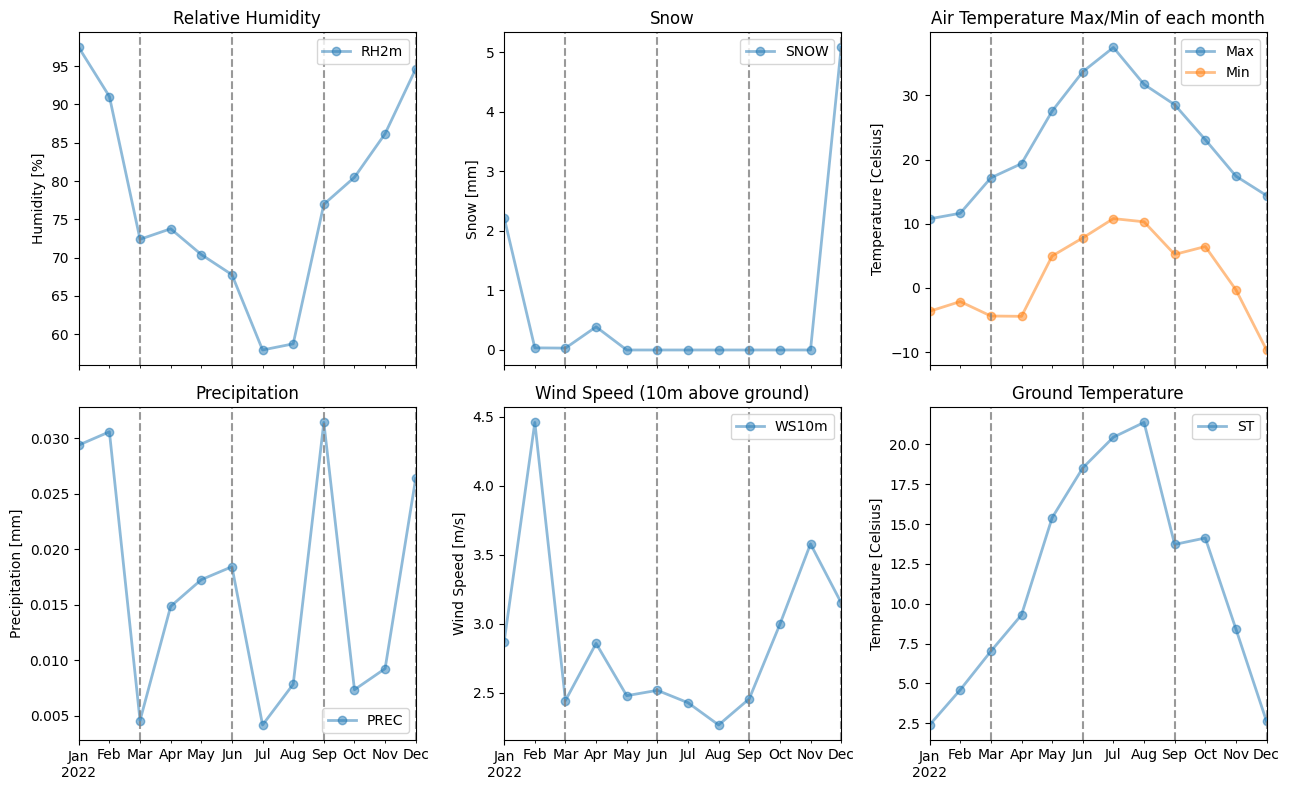

In [31]:

midday_df = df.resample('M').mean()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 8), sharex=True)

midday_df[["RH2m"]].plot(ax=axes[0, 0], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Relative Humidity", ylabel="Humidity [%]")
midday_df[["PREC"]].plot(ax=axes[1, 0], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Precipitation", ylabel="Precipitation [mm]")
midday_df[["SNOW"]].plot(ax=axes[0, 1], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Snow", ylabel="Snow [mm]")
midday_df[["ST"]].plot(ax=axes[1, 2], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Ground Temperature", ylabel="Temperature [Celsius]")
midday_df[["WS10m"]].plot(ax=axes[1, 1], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Wind Speed (10m above ground)", ylabel="Wind Speed [m/s]")
df["ST"].resample('M').max().plot(ax=axes[0, 2], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Air Temperature Max/Min of each month", ylabel="Temperature [Celsius]", label='Max')
df["ST"].resample('M').min().plot(ax=axes[0, 2], linestyle='-', marker='o', alpha=.5, linewidth=2, title="Air Temperature Max/Min of each month", ylabel="Temperature [Celsius]", label='Min')
axes[0, 2].legend()

season_changes = ["2022-03-20", "2022-06-21", "2022-09-22", "2022-12-21"]
for date in season_changes:
    for ax in axes.ravel():
        ax.axvline(pd.Timestamp(date), color='gray', linestyle='--', alpha=0.8)

plt.legend()
plt.tight_layout()
plt.savefig('pl_4.png')


### 6. Outliers detection
Under normality assumption, we should more or less have 289 outliers detected (len(df)*.01).

The table results show normalcy in power and energy data, suggesting a normally distributed variable. However, weather forecasts reveal numerous outliers, particularly in certain categories. Given the nature of forecasts, these outliers shouldn't be removed, as the model aims to predict extreme weather events, such as heavy snowfall occurring only a few days per year.

Expected number of outliers:  288.5 

Number of outliers per column (z-score): 
 Power_1        142
Power_2        145
Power_3        178
Power_4        161
Power_5        186
Power_6        183
Power_7        242
Power_8          7
Power_Total    139
Energy_1         1
Energy_2         2
Energy_3         2
Energy_5         6
Energy_6         4
TT2M            30
ST              30
RH2m            35
WS10m          368
WS100m         357
PREC           582
SNOW           347
dtype: int64 



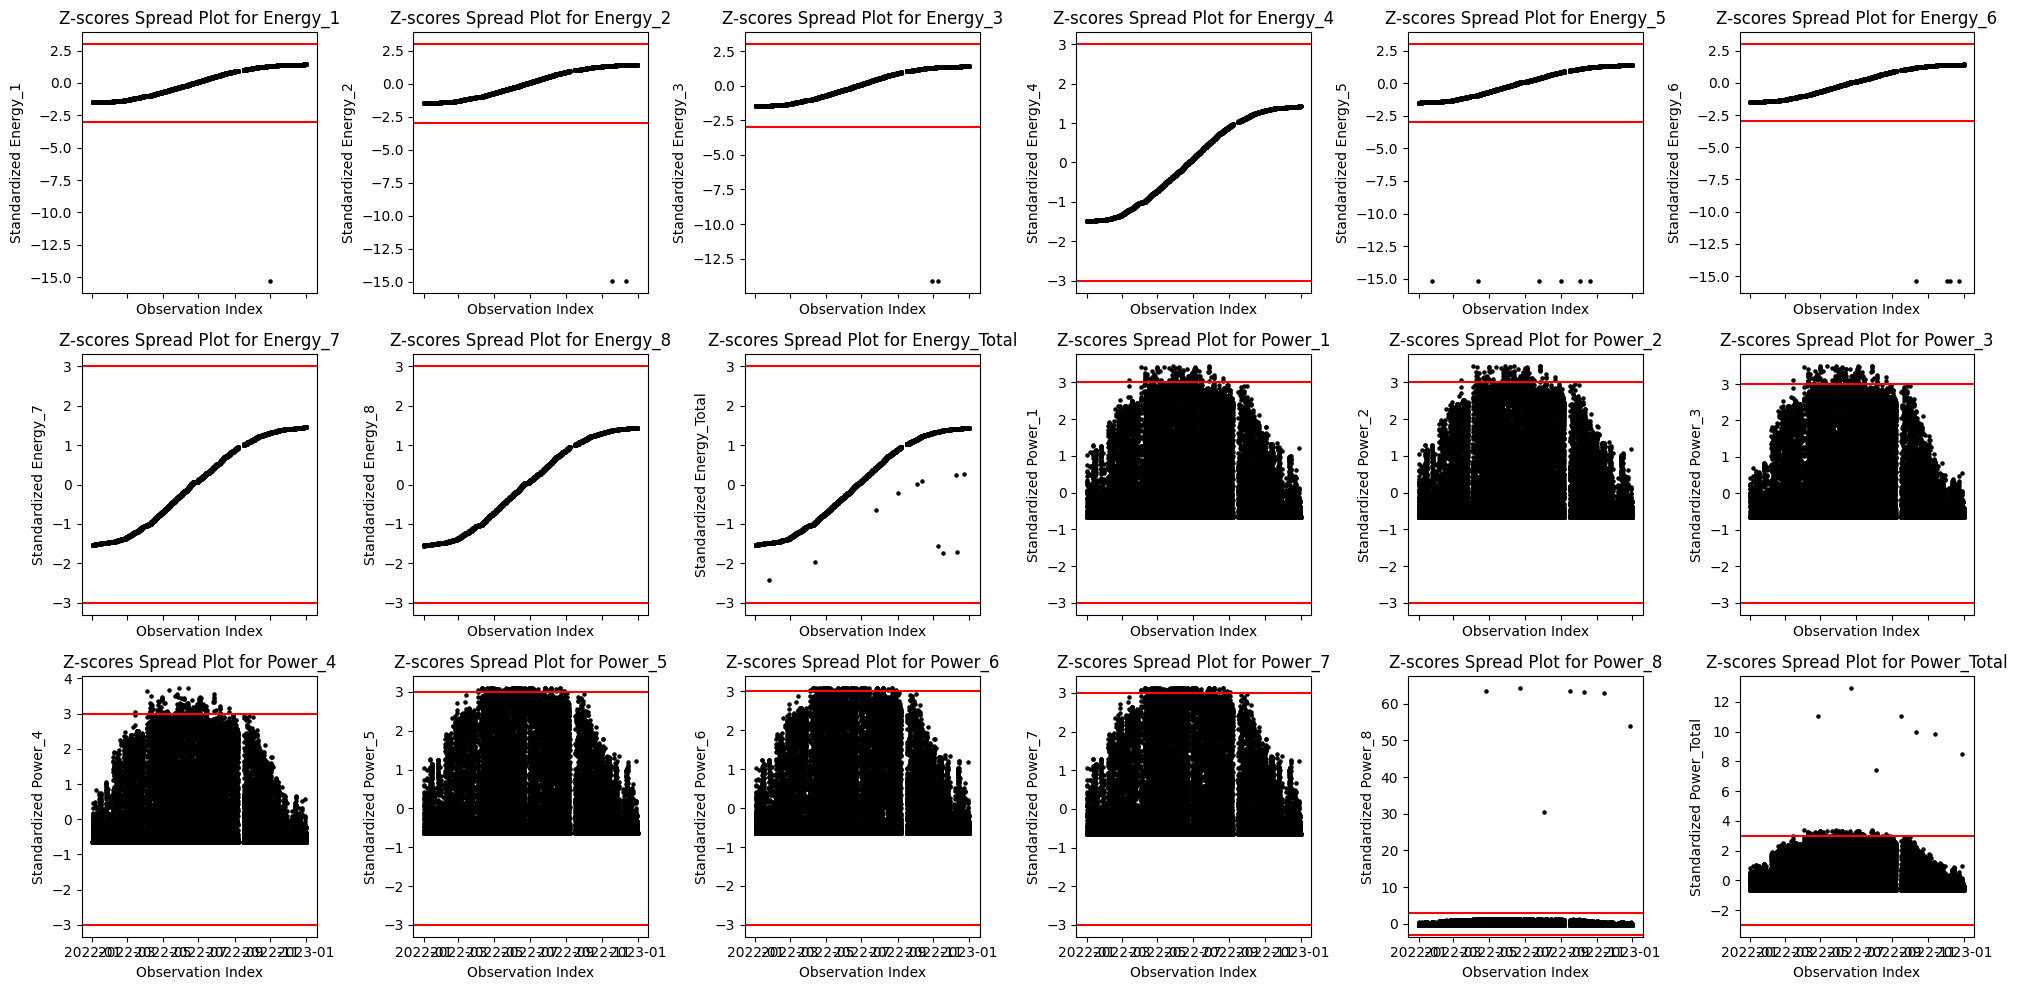

In [32]:
from scipy.spatial.distance import mahalanobis
import scipy as sp

print("Expected number of outliers: ", len(df) * .01, "\n")

# UNIVARIATE OUTLIER DETECTION

# Compute the z-score for each observation
z_scores = df[df.columns[1:]].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Set a threshold for classifying a point as an outlier
threshold = 3

# Filter outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
outliers_count = outliers_mask.sum()
print("Number of outliers per column (z-score): \n", outliers_count[outliers_count != 0], "\n")

df_no_z_outliers = df[~outliers_mask.any(axis=1)]

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10), sharex=True)

columns_to_plot = ["Energy_1", "Energy_2", "Energy_3", "Energy_4", "Energy_5", "Energy_6", "Energy_7", "Energy_8", "Energy_Total",
                    "Power_1", "Power_2", "Power_3", "Power_4", "Power_5", "Power_6", "Power_7", "Power_8", "Power_Total"]

for i, col in enumerate(columns_to_plot):
    row = i // 6
    coln = i % 6

    # Scatter plot for z-scores of the column
    axes[row, coln].scatter(z_scores.index, z_scores[col], color='black', s=5)  # s is for marker size
    axes[row, coln].axhline(y=threshold, color='red', linestyle='-')
    axes[row, coln].axhline(y=-threshold, color='red', linestyle='-')
    
    # Annotate outliers for the column
    outliers_indices = z_scores[z_scores[col].abs() > threshold].index
    
    axes[row, coln].set_title(f"Z-scores Spread Plot for {col}")
    axes[row, coln].set_xlabel("Observation Index")
    axes[row, coln].set_ylabel(f"Standardized {col}")

plt.tight_layout()
plt.savefig('pl_5.png')


In [33]:
# POWER OUTLIERS
power_columns = ["Power_8", "Power_Total"]
mask = z_scores[power_columns].abs() > 5 # 5 is an arbitrary threshold to remove only extreme outliers
df_cleaned = df[~mask.any(axis=1)]
df = df_cleaned.copy()

# ENERGY OUTLIERS
energy_columns = ["Energy_1", "Energy_2", "Energy_3", "Energy_4", "Energy_5", "Energy_6", "Energy_7", "Energy_8", "Energy_Total"]
mask = z_scores[energy_columns].abs() > 5 # 5 is an arbitrary threshold to remove only extreme outliers
df_cleaned = df[~mask.any(axis=1)]
df = df_cleaned.copy()

/tmp/ipykernel_5834/3438382826.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[~mask.any(axis=1)]


We can see on the re-plotted index plot below that all of the data as been successfully cleaned-up and is now ready for thorough analysis.

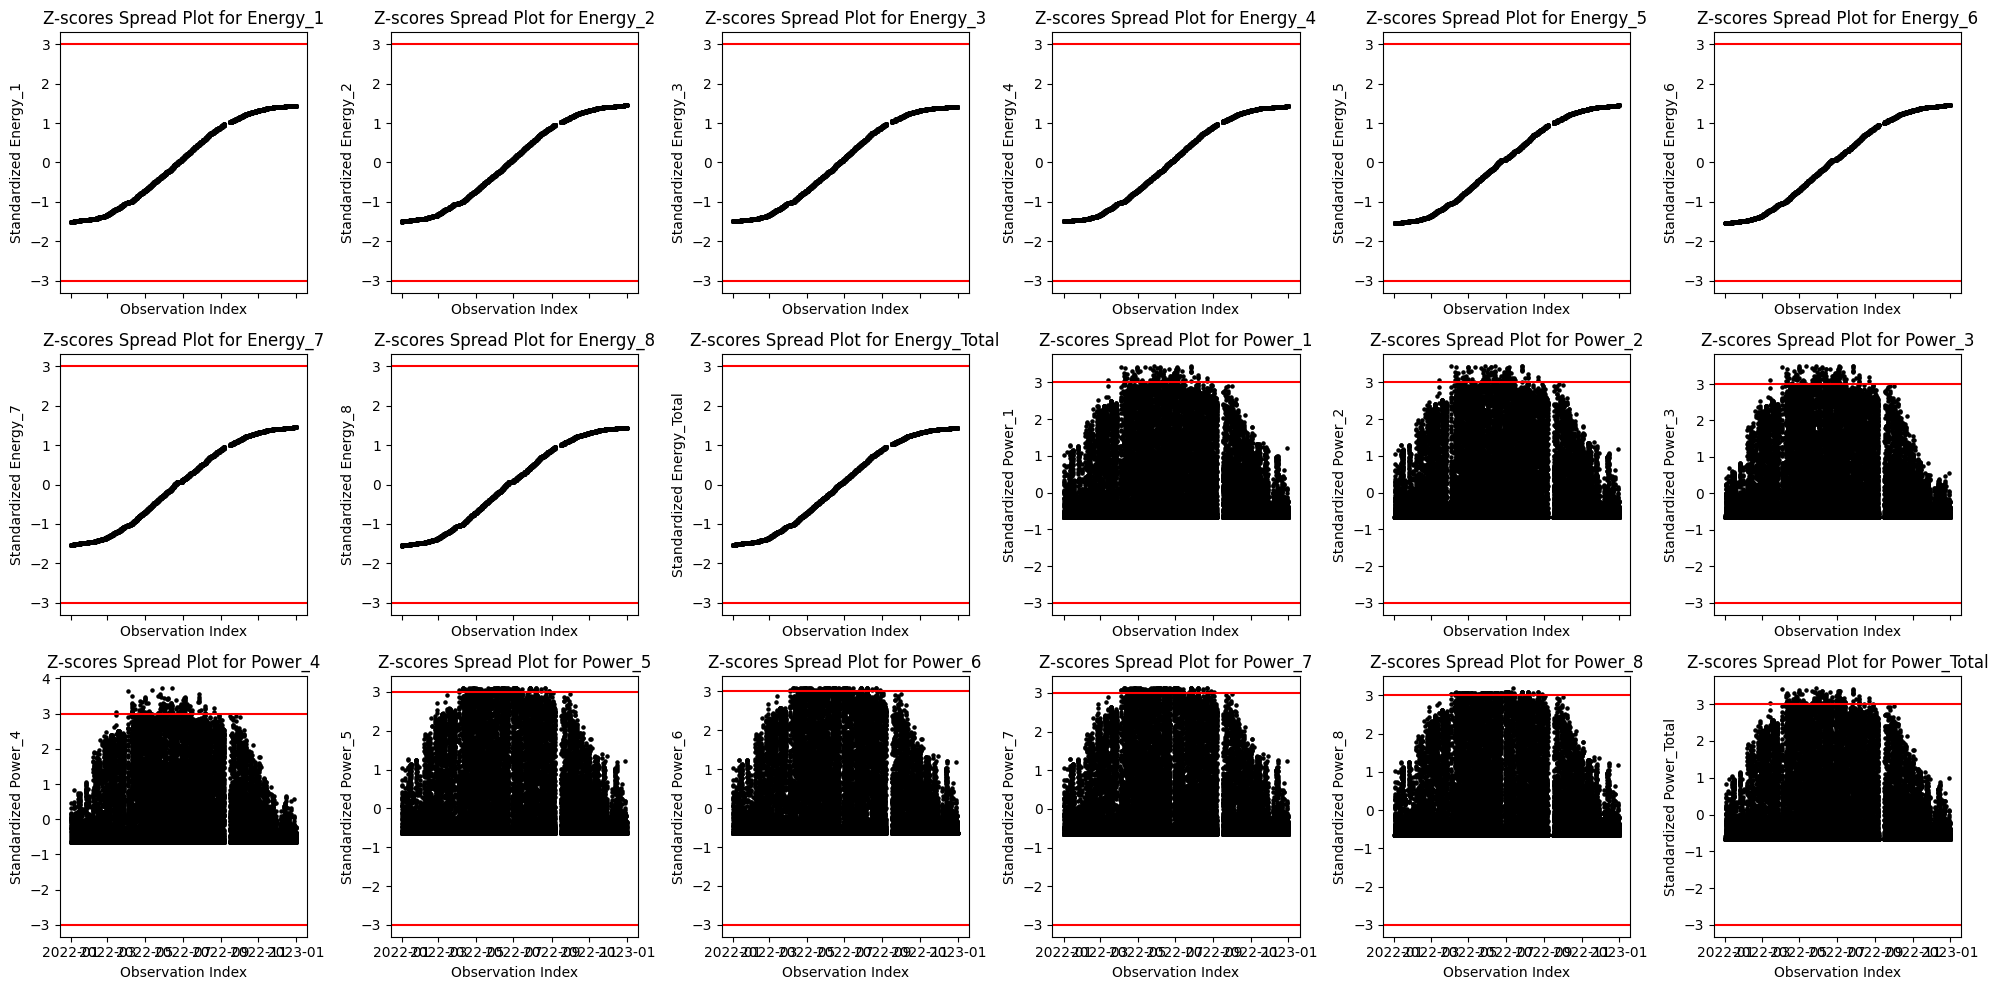

In [34]:
# Compute the z-score for each observation
z_scores = df[df.columns[1:]].apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Set a threshold for classifying a point as an outlier
threshold = 3

# Filter outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
outliers_count = outliers_mask.sum()

df_no_z_outliers = df[~outliers_mask.any(axis=1)]

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10), sharex=True)

columns_to_plot = ["Energy_1", "Energy_2", "Energy_3", "Energy_4", "Energy_5", "Energy_6", "Energy_7", "Energy_8", "Energy_Total",
                    "Power_1", "Power_2", "Power_3", "Power_4", "Power_5", "Power_6", "Power_7", "Power_8", "Power_Total"]

for i, col in enumerate(columns_to_plot):
    row = i // 6
    coln = i % 6

    # Scatter plot for z-scores of the column
    axes[row, coln].scatter(z_scores.index, z_scores[col], color='black', s=5)  # s is for marker size
    axes[row, coln].axhline(y=threshold, color='red', linestyle='-')
    axes[row, coln].axhline(y=-threshold, color='red', linestyle='-')
    
    # Annotate outliers for the column
    outliers_indices = z_scores[z_scores[col].abs() > threshold].index
    
    axes[row, coln].set_title(f"Z-scores Spread Plot for {col}")
    axes[row, coln].set_xlabel("Observation Index")
    axes[row, coln].set_ylabel(f"Standardized {col}")

plt.tight_layout()
plt.savefig('pl_6.png')


### 7. Mahalanobis distance
The Mahalanobis distance is especially useful when dealing with multivariate datasets. It doesn’t just consider the distance, it weights it according to the variability of each variable, thus taking into account the covariance among variables. This is why it is usefull to identify dataset outliers.  

Regarding the weather forecast and solar power data, these outliers can often represent extreme but possible scenarios that a solar power generation system might encounter. While they are statistical outliers, they may not be removed from the dataset because they could represent rare, but possible extreme values of solar irradiance, temperature or snowy events for example.

In [35]:
# Calculate the mean and inverse covariance matrix
mean = df[df.columns[1:]].mean()
inv_cov = np.linalg.inv(df[df.columns[1:]].cov())

# Compute the Mahalanobis distance for each observation
m_distances = df[df.columns[1:]].apply(lambda x: mahalanobis(x, mean, inv_cov), axis=1)

# Set a threshold for classifying a point as an outlier
threshold = sp.stats.chi2.ppf(0.99, df=len(df.columns)-1)

# Filter outliers
outliers_mask = m_distances > threshold
outliers_count = outliers_mask.sum()
print("Number of outliers for classic distance:", outliers_count, "\n")


# SORTIE GUILLAUME : 2903

/home/guilome/miniconda3/lib/python3.11/site-packages/scipy/spatial/distance.py:1023: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


Number of outliers for classic distance: 2903 



### 8. Descriptive statistics of each individual column of the dataset

In [36]:
kurtosis = df[df.columns[1:]].kurtosis()
skewness = df[df.columns[1:]].skew()
trimmed_means = df.apply(lambda x: sp.stats.trim_mean(x.dropna(), proportiontocut=.1))
means = df[df.columns[1:]].mean()
stds = df[df.columns[1:]].std()
q1s = df[df.columns[1:]].quantile(0.25)
medians = df[df.columns[1:]].median()
q3s = df[df.columns[1:]].quantile(0.75)
mins = df[df.columns[1:]].min()
maxs = df[df.columns[1:]].max()

# Create a dataframe with the statistics
stats_df = pd.DataFrame({'kurtosis': kurtosis, 'skewness': skewness, 'trimmed_mean': trimmed_means, 'mean': means, 'std': stds, 'q1': q1s, 'median': medians, 'q3': q3s, 'min': mins, 'max': maxs})
stats_df = stats_df.transpose()
stats_df = stats_df.drop(columns=['id'])
# print the statistics
for col in stats_df.columns:
    print(f"Statistics for {col}: \n", stats_df[col], "\n")


Statistics for CD: 
 kurtosis       -1.139823
skewness        0.852813
trimmed_mean    0.259524
mean            0.307606
std             0.428113
q1              0.000000
median          0.000000
q3              0.860000
min             0.000000
max             1.000000
Name: CD, dtype: float64 

Statistics for CM: 
 kurtosis        2.515971
skewness        2.074859
trimmed_mean    0.055016
mean            0.143988
std             0.326291
q1              0.000000
median          0.000000
q3              0.010000
min             0.000000
max             1.000000
Name: CM, dtype: float64 

Statistics for CU: 
 kurtosis       -0.272399
skewness        1.247657
trimmed_mean    0.175161
mean            0.240111
std             0.394149
q1              0.000000
median          0.000000
q3              0.350000
min             0.000000
max             1.000000
Name: CU, dtype: float64 

Statistics for Energy_1: 
 kurtosis       -1.406953e+00
skewness       -2.014348e-02
trimmed_mean    4.759

**CD**:
- Most data points are likely clustered around lower values (mean close to 0), with a long tail of higher values.
- The median being zero suggests that at least half the observations have no cloud cover.

**CM**:
- A large number of zero values, indicating many observations without cloudiness, with few extreme values. (even q3 is low, indicating a very large number of days without middle clouds.)

**CU**:
- A median of zero indicates that over half the data has a low CU value.

**Energy_***:
- The trimmed mean is very close to the actual mean, which could indicate that outliers detection has been succesfully completed.

**PREC**:
- Highly positively skewed with a really sharp peak.
- The median and Q1 are zero, indicating that most of the data points record no or very little precipitation, with a few large outliers.
- The trimmed mean reinforces this as when we remove potential outliers, we lower even more the value of the mean that is already pretty low.

**Power_***:
- Kurtosis and skewness suggest a gaussian distribution.
- The variability seems to be pretty high, as can be seen in regards to their standard deviation.

**RH2m**:
- The distribution is relatively symmetrical around the mean, with most values close to 77.53%.

**SNOW**:
- Extremely positively skewed with a really sharp peak (almmost always equal to 0 except for rare occurences).
- Most observations have no snowfall, with rare instances of heavy snowfall. This can be seen by the trimmed mean equal to 0 after the removal of the 5% highs and that the max value is arround 72mm.


### 9. Correlation between columns of the dataset

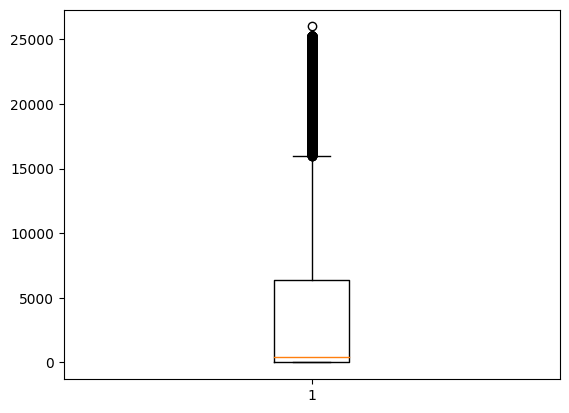

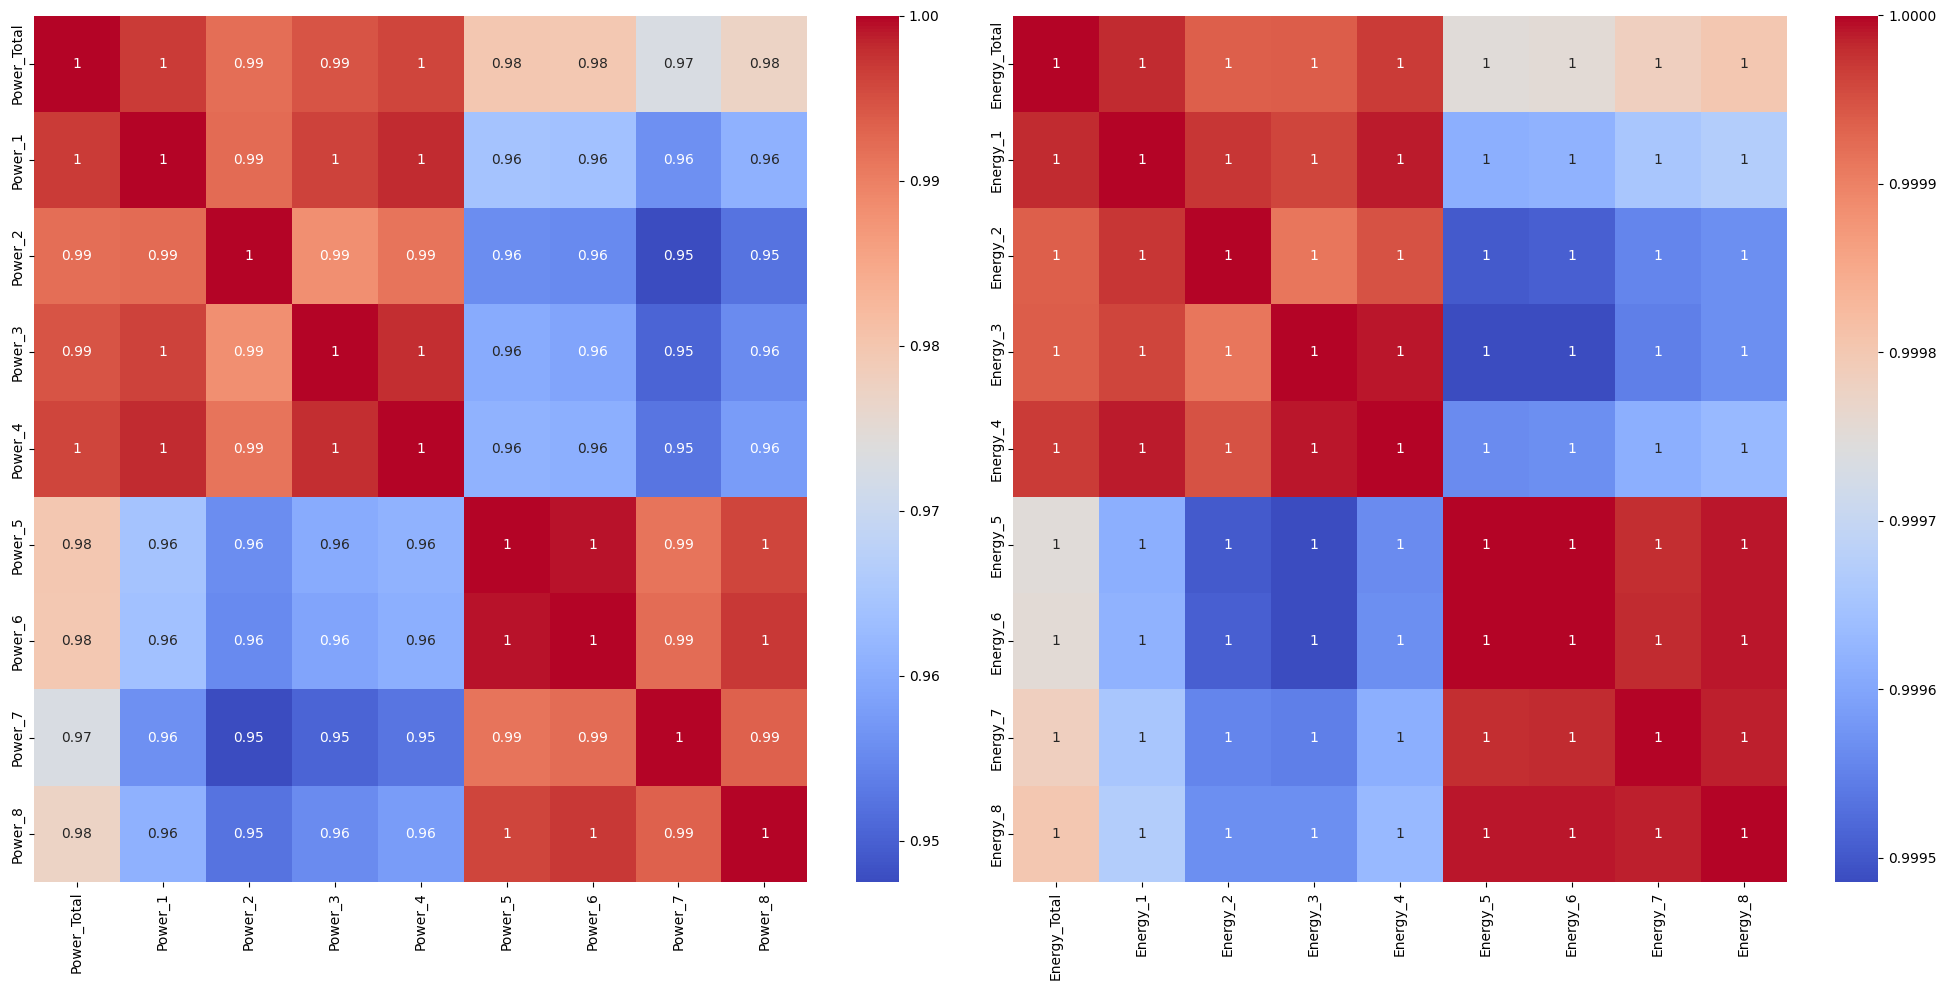

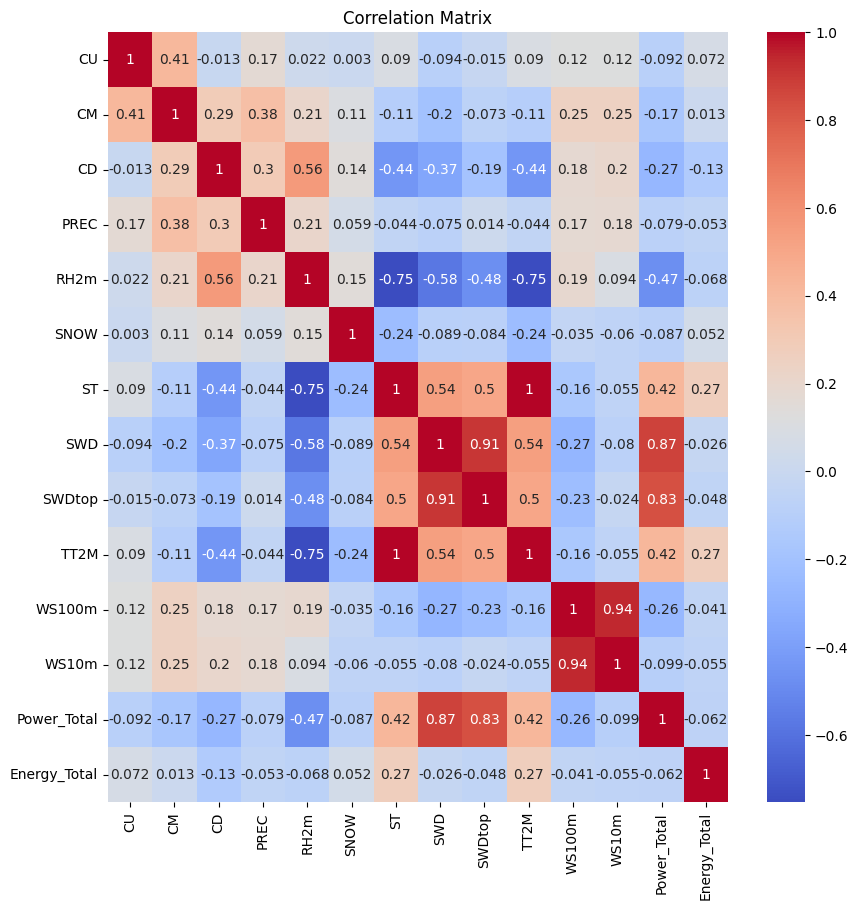

In [38]:
# compute the correlation matrix

condition_columns = ["Energy_Total", "Energy_1", "Energy_2", "Energy_3", "Energy_4", "Energy_5", "Energy_6", "Energy_7", "Energy_8"]

corr_en = df[condition_columns].corr()

condition_columns = ["Power_Total", "Power_1", "Power_2", "Power_3", "Power_4", "Power_5", "Power_6", "Power_7", "Power_8"]

corr_pw = df[condition_columns].corr()

# plot the correlation matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.heatmap(corr_en, ax=axes[1], annot=True, cmap='coolwarm')
sns.heatmap(corr_pw, ax=axes[0], annot=True, cmap='coolwarm')
plt.tight_layout()
plt.savefig('pl_8.png')

weather_condition_columns = ["CU", "CM", "CD", "PREC", "RH2m", "SNOW", "ST", "SWD", "SWDtop", "TT2M", "WS100m", "WS10m"]
power_columns = ["Power_Total", "Energy_Total"]

# compute the correlation between weather conditions and power
corr = df[weather_condition_columns + power_columns].corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, ax=ax, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('pl_9.png')




**Strong Positive Correlations**:

- SWD - SWDTop: This correlation is expected as both represent solar irradiance measurements, with SWD being at the ground level and SWDtop being at the top of the atmosphere. The values should track together as they are both affected by the solar elevation angle and day length.

- ST - TT2m: Surface temperature (ST) and temperature at 2 meters above the ground (TT2M) are closely related because they both reflect the heating effects of the sun on the Earth's surface and near-surface air.

- ws10m - ws100m: Wind speed at 10 meters is expected to be correlated with wind speed at 100 meters, even though it's usually expected to be lower closer to the ground.

- SWD(Top) - Power_Total: A high solar irradiance leads to increased solar power generation (as said in the explaination of the datasets that the teacher gave). Therefore, the total solar irradiance at the top of the atmosphere (or the SWD on the ground) is a determining factor for the potential solar power generation measured by Power_Total.

**Strong Negative Correlations**:

- ST/TT2m - RH2m: Temperature and relative humidity are often inversely related due to the nature of air to hold moisture. As the temperature increases, the air can hold more water vapor, which can lower relative humidity if additional moisture is not added to the air.

**Moderate Positive Correlations**:

- SWD/SWDTop - TT/TT2m: Higher solar irradiance leads to increased temperatures, both at the surface (ST) and at 2 meters above ground (TT2M).

- CD - RH2m: Low clouds are often associated with higher humidity levels as they form in conditions where the air is moist and there's not much temperature difference between the ground and the atmosphere.

- CM - PREC: Medium-level clouds can be associated with precipitation, as they maybe indicate the presence of clouds that can lead to rain or snow.

- CU - CM: High clouds and medium clouds can be positively correlated because they (maybe) can be part of the same weather system.

**Moderate Negative Correlations**:

- CD - ST/TT2m: Low clouds can block sunlight, leading to lower temperatures at the Earth's surface and at 2 meters above the ground.

- RH2m - Power_Total: Higher humidity can be associated with cloud coverage and precipitation, which would reduce the efficiency of solar power generation, thereby lowering the Power_Total. Or maybe solar panels are less efficient when moist

- CD - SWD: The presence of low clouds can reduce the amount of solar radiation reaching the ground, hence the negative correlation with SWD.


### 10. Evolution of the daily production data and the daily irradiance data

Correlation between daily production and max solar irrandiance:  0.9027902578376841
Correlation between daily production and mean solar irrandiance:  0.9245229982465942


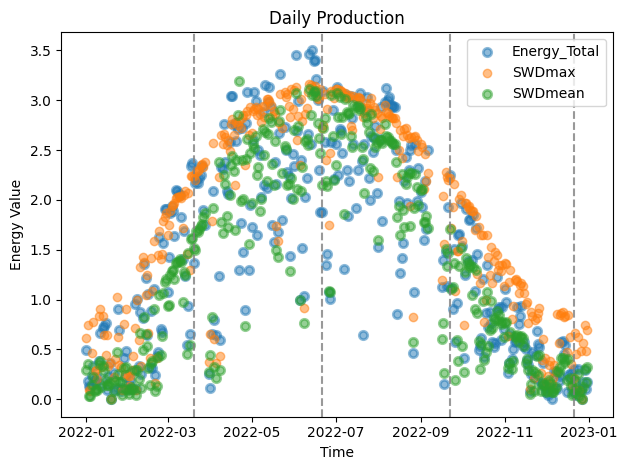

In [ ]:
solar_irrandiance_max =df["SWD"].resample('D').max()
solar_irrandiance_mean =df["SWD"].resample('D').mean()


daily_production = df["Energy_Total"].dropna()

daily_production = daily_production.resample('D').max() - daily_production.resample('D').min()

# Plot the daily production
ax = plt.plot(figsize=(10, 5))

ax = plt.scatter(daily_production.index, daily_production / daily_production.std(ddof=1), alpha=.5, label="Energy_Total", linewidth=2)

corr_max = solar_irrandiance_max.corr(daily_production)
ax = plt.scatter(solar_irrandiance_max.index, solar_irrandiance_max/solar_irrandiance_max.std(ddof=1), alpha=.5, label="SWDmax")

corr_mean = solar_irrandiance_mean.corr(daily_production)
ax = plt.scatter(solar_irrandiance_mean.index, solar_irrandiance_mean/solar_irrandiance_mean.std(ddof=1), alpha=.5, linewidth=2, label="SWDmean")


season_changes = ["2022-03-20", "2022-06-21", "2022-09-22", "2022-12-21"]
for date in season_changes:
    ax = plt.axvline(pd.Timestamp(date), color='gray', linestyle='--', alpha=0.8)

plt.title("Daily Production")
plt.xlabel("Time")
plt.ylabel("Energy Value")
plt.legend()

plt.tight_layout()
plt.savefig('pl_10.png')


#compute and print the daily production correlation with the max solar irrandiance and mean solar irrandiance
print("Correlation between daily production and max solar irrandiance: ", corr_max)
print("Correlation between daily production and mean solar irrandiance: ", corr_mean)


With the plot and the correlation between the two variable in mind, we can see that the daily production is highly correlated with the energy produced that day. The two distribution look alike (When normalized) and it looks like one could be used to try and predict the other.

1. `solar_irradiance_max`: The maximum solar irradiance (`SWD`) is calculated for each day using the `max()` function after resampling the original time series data to daily frequency (`'D'`).

2. `solar_irradiance_mean`: The mean solar irradiance (`SWD`) is calculated for each day using the `mean()` function on the daily resampled data.

3. `daily_production`: The daily energy production is then calculated as the difference between the daily maximum and minimum, providing the net energy produced each day.

4. A scatter plot is created to visualize the normalized daily energy production and solar irradiance data. The data points for energy production (`Energy_Total`) and solar irradiance (`SWDmax` and `SWDmean`) are plotted as scatter points, with normalization achieved by dividing by the standard deviation (`std(ddof=1)`). This normalization allows for a comparison on the same scale, otherwise it would be impossible to compare the datapoints given the difference in scale between the two columns.

5. Vertical lines are added to the plot to indicate seasonal changes on specific dates (`season_changes`).

6. The correlation coefficients between daily energy production and the maximum/mean solar irradiance are calculated and printed for analysis afterwards.

### 11. Evolution of the distribution of the solar power production over the course day


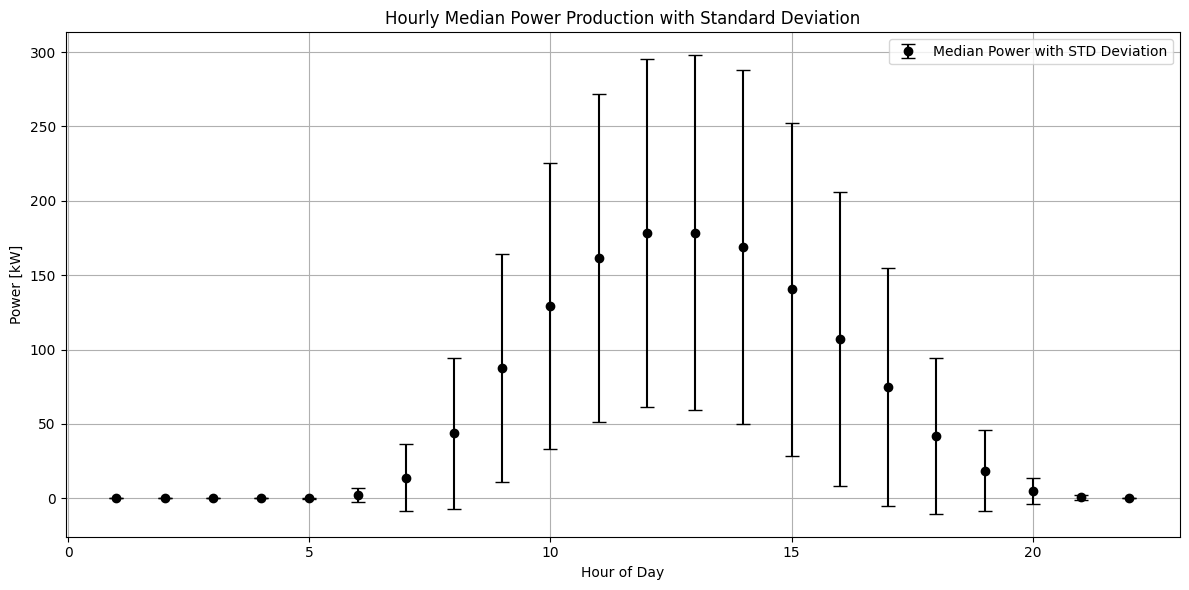

In [ ]:
mean_power = df["Power_Total"].groupby(df.index.hour).mean() / 1000
std_devs = df["Power_Total"].groupby(df.index.hour).std(ddof=1) / 1000

# Plot the daily production with error bars representing standard deviation
plt.figure(figsize=(12, 6))
plt.errorbar(mean_power.index, mean_power, yerr=std_devs, fmt='o', capsize=5, label='Median Power with STD Deviation', color='black')
plt.title('Hourly Median Power Production with Standard Deviation')
plt.xlabel('Hour of Day')
plt.ylabel('Power [kW]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('pl_11.png')


**Shape of the Distribution**:

Solar power production follows a Gaussian-shaped pattern, peaking around midday and decreasing towards sunrise and sunset. The median is low in the early morning and increases throughout the day, reaching its highest point at midday, mirroring solar irradiance patterns.

**Spread of the Distributions**:

The data's spread, reflected in error bars, is minimal at sunrise and sunset, indicating low variability. Maximum variability occurs around midday, corresponding to the peak of solar production, potentially influenced by seasonal solstices.

### 12. Evolution of the distribution of the solar power production over the course of the day for each month

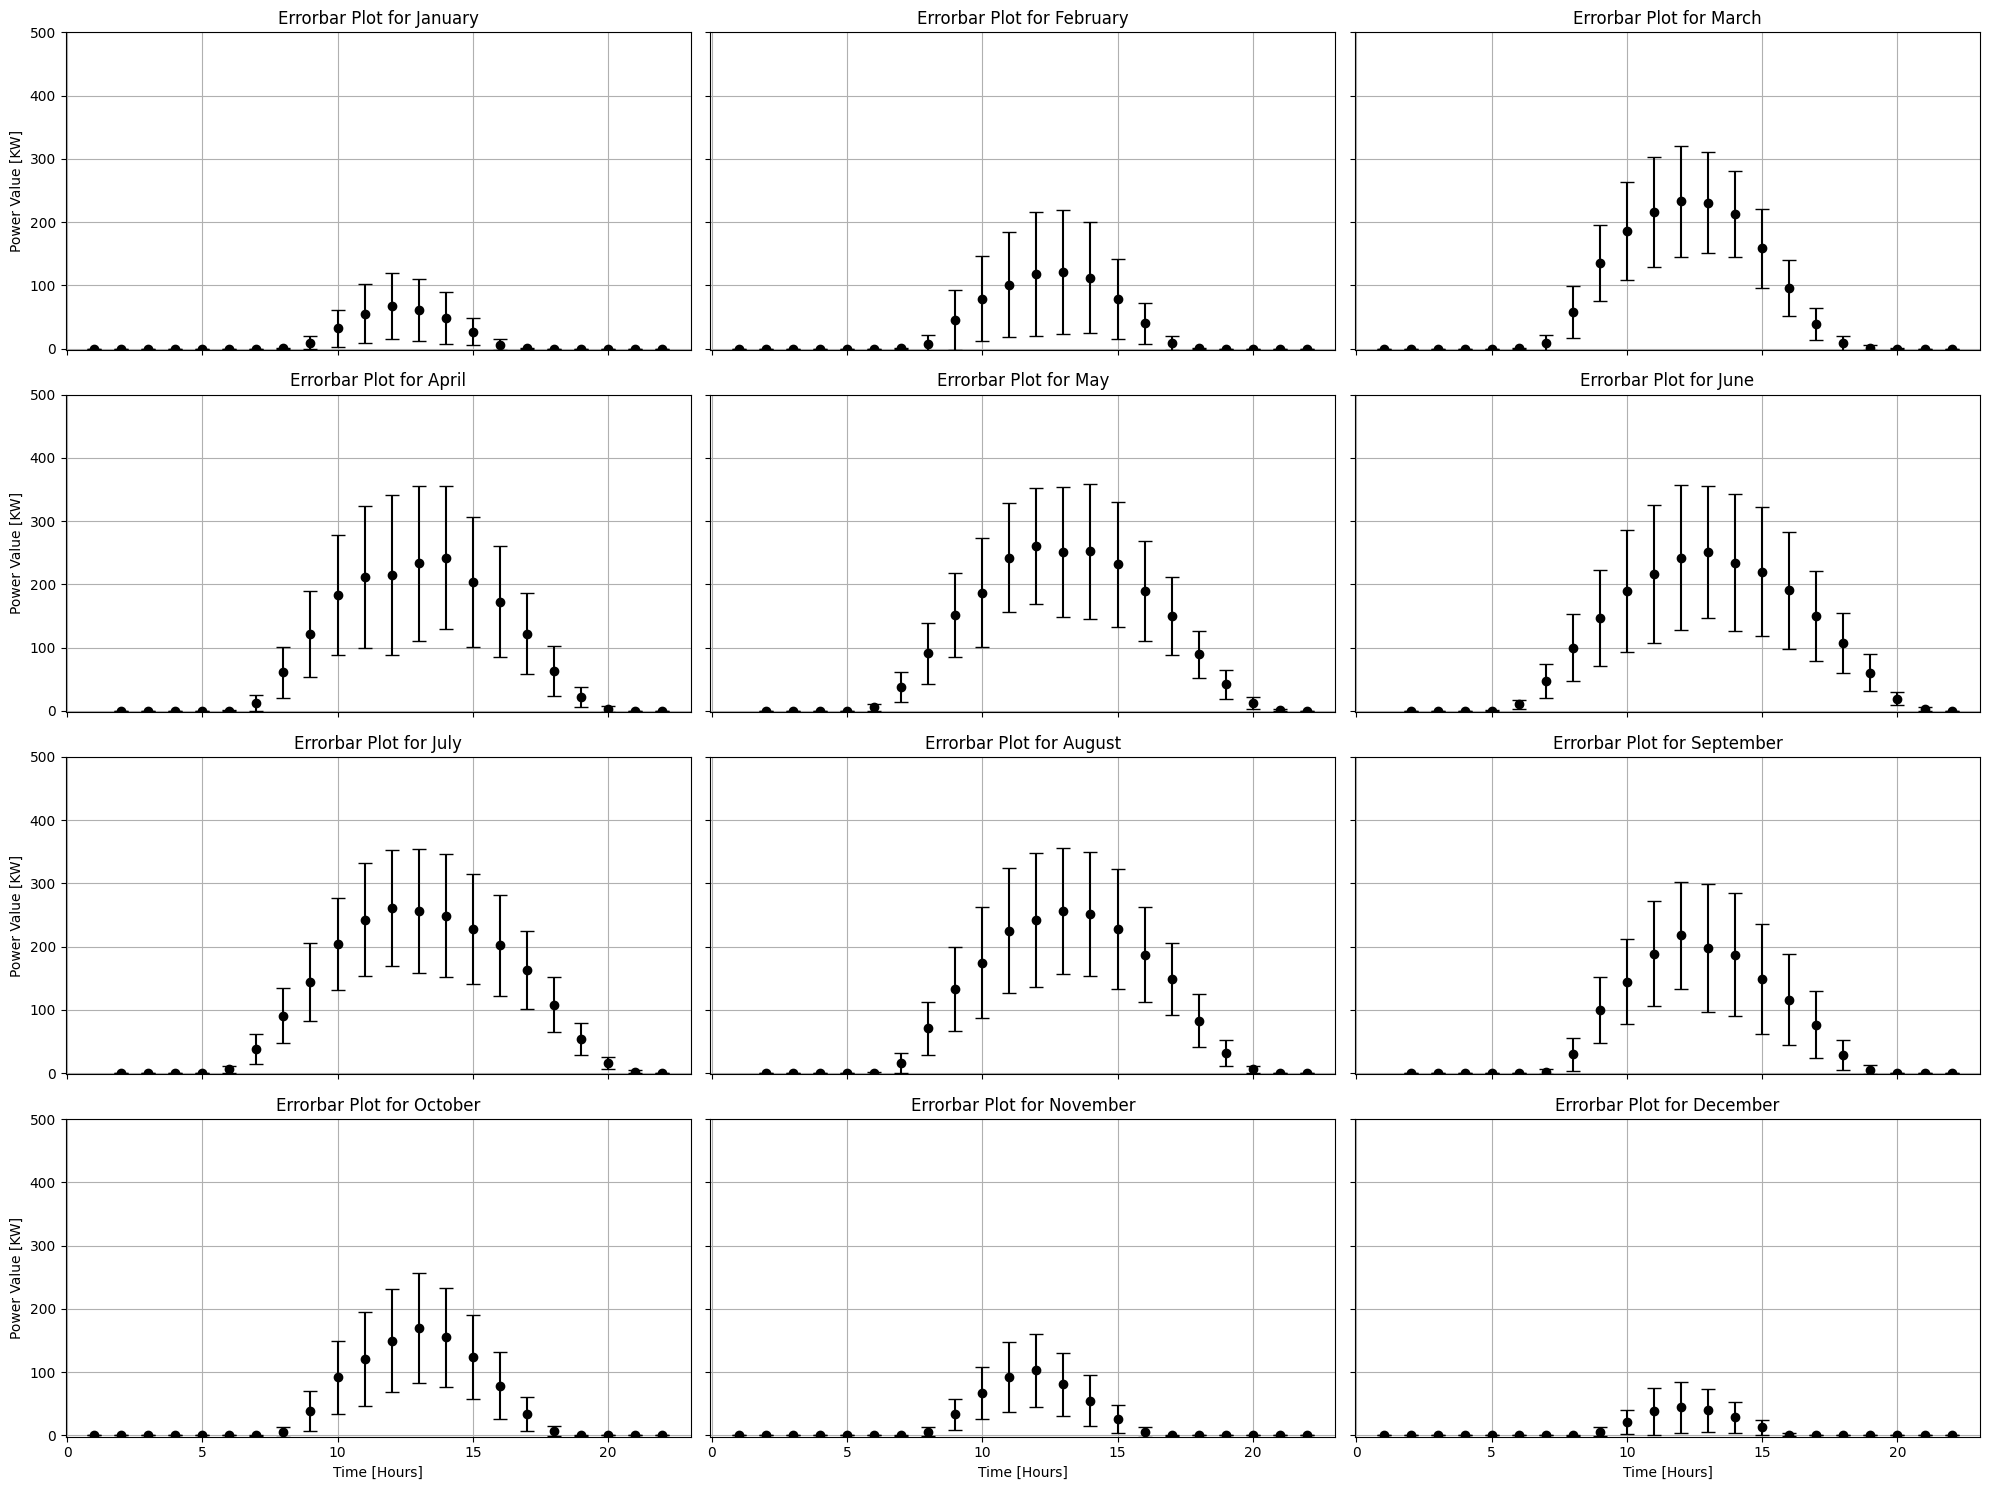

In [ ]:
mean_power = df["Power_Total"].groupby([df.index.month, df.index.hour]).mean()/1000
std_power = df["Power_Total"].groupby([df.index.month, df.index.hour]).std()/1000

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Plot the daily production for each month, with a different color for each month
fig, ax = plt.subplots(4, 3, figsize=(20, 15), sharex=True, sharey=True)

for month in range(1, 13):
    row_index = (month - 1) // 3
    col_index = (month - 1) % 3
    ax[row_index, col_index].errorbar(mean_power[month].index, mean_power[month], label=months[month-1], color="black", yerr=std_power[month], fmt='o', capsize=5)
    ax[row_index, col_index].set_title("Errorbar Plot for " + months[month-1])
    if row_index == 3:
        ax[row_index, col_index].set_xlabel("Time [Hours]")
    if col_index == 0:
        ax[row_index, col_index].set_ylabel("Power Value [KW]")
    ax[row_index, col_index].grid(True)
    ax[row_index, col_index].set_ylim(-2, 500) 

plt.tight_layout()
plt.savefig('pl_12.png')


**Shape of the Distribution Across Months:**

- **Consistency**: Monthly distributions follow the expected Gaussian pattern of solar energy production, peaking around midday and decreasing towards sunrise and sunset.
- **Seasonal Variation** : Median power production varies monthly, reflecting seasonal changes in sun elevation. Summer months (June, July, August) exhibit higher peaks due to longer daylight hours and higher sun angles, compared to winter months (December, January, February).
- **Sunrise and Sunset**: The timings of daily power production onset and end slightly shift across the months, indicating changes in sunrise and sunset times throughout the year.

**Spread Across Months:**

- **Consistency at Night**: Minimal data spread during night and early morning hours (0 to 6 am) and late evening hours after sunset suggests little to no solar power production during these times throughout the year.
- **Variability at Midday**: High variability in midday power production, reflected in error bars, suggests potential weather influences causing fluctuations, observed notably in months like April and May.

In [40]:
df.to_csv('../data/no_outliers.csv', sep=';')